## Image Segmentation with clustering - An IBM Machine Learning Project - Coursera

    In this project we are going to segment an arial image containing aircrafts by the 
    use of unsupervised machine learning task of clustering.
    
    We are going to use three types of clustering algorithms:
        1. K-Means
        2. DBSCAN
        3. Gausian Mixture Model

### Data Reference

      Reference: https://www.kaggle.com/airbusgeo/airbus-aircrafts-sample-dataset
            

### Import Libraries

In [1]:
import numpy as np # Numpy
import pandas as pd # Pandas
import matplotlib.pyplot as plt  # Plotting
from sklearn.preprocessing import scale # Scaling
from sklearn.cluster import KMeans # k-Means
from sklearn.cluster import DBSCAN # DBSCAN
from sklearn.mixture import GaussianMixture  as GMM # GMM
from PIL import Image # Pillow

### Read Data

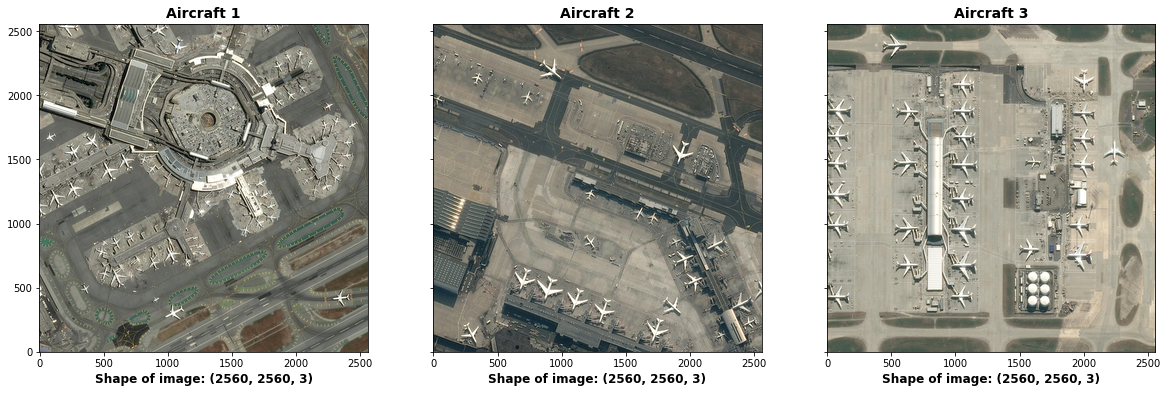

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize =(20,12), squeeze=0, sharex=True, sharey=True) # Subplots
axes = np.array(axes) # Makes Array to Iterate

j=0
for i, ax in enumerate(axes.reshape(-1)):
    img = plt.imread(f'Aircraft_{i+1}.jpg') # Read Image
    ax.imshow(img, interpolation='lanczos', origin='lower') # Show Image
    ax.set_title(f'Aircraft {i+1}', fontdict={'fontsize':14, 'fontweight':'semibold'}) # St Title
#     ax.set_axis_off() # Axis Off
    ax.set_xlabel(f'Shape of image: {str(img.shape)}', fontdict={'fontsize':12, 'fontweight':'semibold'}) # Xlabel
    j=j+1 # Increment

    The shape of images in very high so we will reduce the resolution.

### Format Data

In [11]:
img1 = Image.open('Aircraft_1.jpg') # Open
img1 = img1.resize((250,250), Image.ANTIALIAS) # Resize
img1.save('Aircraft_1_Resized.jpg') # Save

In [12]:
img2 = Image.open('Aircraft_2.jpg') # Open
img2 = img2.resize((250,250), Image.ANTIALIAS) # Resize
img2.save('Aircraft_2_Resized.jpg') # Save

In [13]:
img3 = Image.open('Aircraft_3.jpg') # Open
img3 = img3.resize((250,250), Image.ANTIALIAS) # Resize
img3.save('Aircraft_3_Resized.jpg') # Save

### Read Formated Data

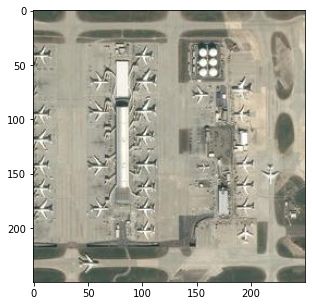

In [46]:
img1 = plt.imread('Aircraft_3_Resized.jpg') # Read Image
plt.figure(figsize=(5,5)) # Figure
plt.imshow(img1) # Image
plt.show() # Show

In [47]:
x1 = img1.shape[0] # First Number in shape
x2 = img1.shape[1] # Second Number in shape
x3 = img1.shape[2] # Channels

In [48]:
print('Shape of Image:', img1.shape) # Print Shape 

Shape of Image: (250, 250, 3)


### Reshape the Image

In [49]:
img_flat = img1.reshape(x1*x2,3)
img_flat.shape

(62500, 3)

In [75]:
print('Shape of Flattened Image:', img_flat.shape)

Shape of Flattened Image: (62500, 3)


### K-Means

#### Elbow method to find optimal k-value

In [50]:
num_cluster = 15 # Number of clusters
k = [] # List to append k
inertia = [] # List to append inertia
clustered = [] # List of Clustered Images
for i in range(1,num_cluster): # Loop
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=400, init='k-means++') # K-Means Object
    k_means = kmeans.fit(img_flat) # Fit Data
    k.append(i) # Append 
    inertia.append(k_means.inertia_) # Append
    
    # Image the clusters
    img_flat_c = img_flat.copy() # Copy the original flattened image
    # Loop to rehape the cluster image
    for i in np.unique(kmeans.labels_): 
        img_flat_c[kmeans.labels_==i,:] = kmeans.cluster_centers_[i] # Create clustered Image
    img_flat_c = img_flat_c.reshape(img1.shape) # Reshape
    clustered.append(img_flat_c) # Append

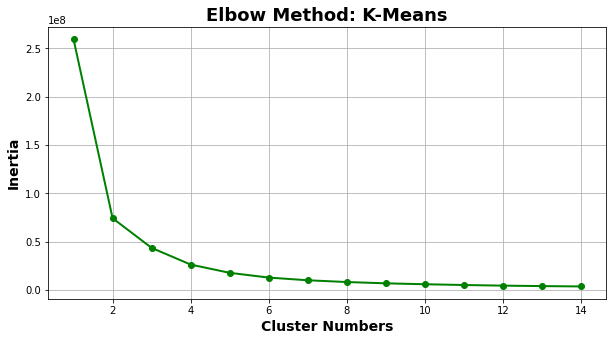

In [51]:
plt.figure(figsize=(10,5)) # Figure
plt.plot(k, inertia, color='green', linewidth=2, marker='o') # Plot
plt.title('Elbow Method: K-Means', fontdict={'fontsize':18, 'fontweight':'semibold'}) # Title
plt.xlabel('Cluster Numbers', fontdict={'fontsize':14, 'fontweight':'semibold'}) # X-Label
plt.ylabel('Inertia', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Y-Label
plt.grid(True) # Grid
plt.show() # Show

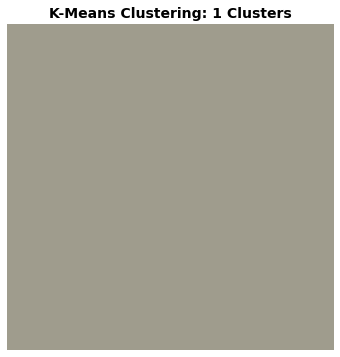

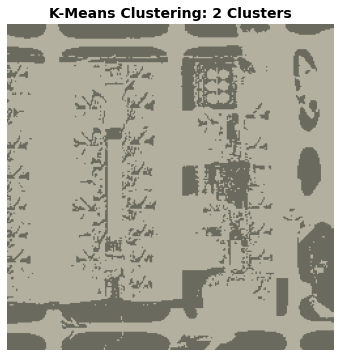

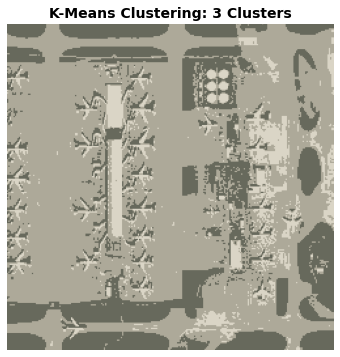

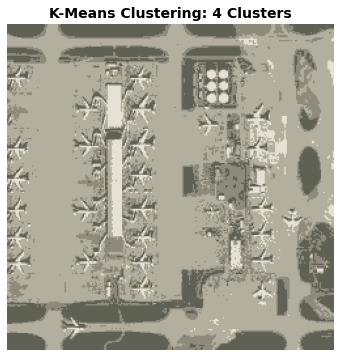

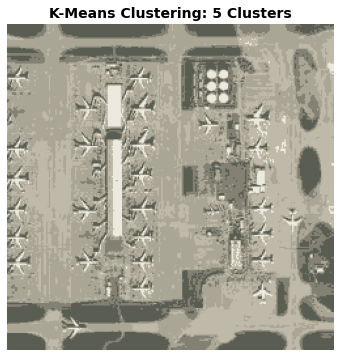

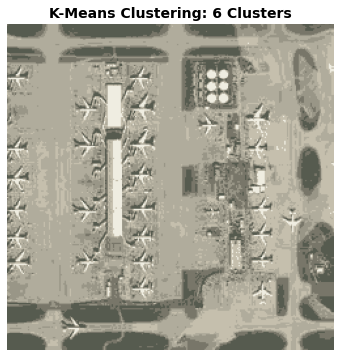

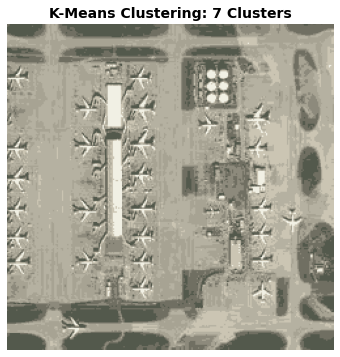

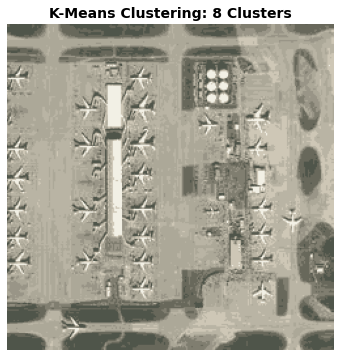

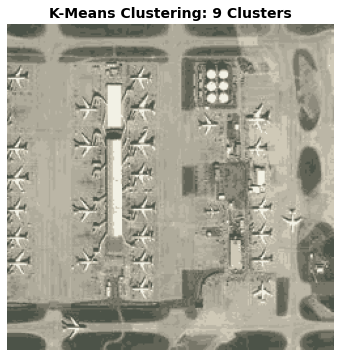

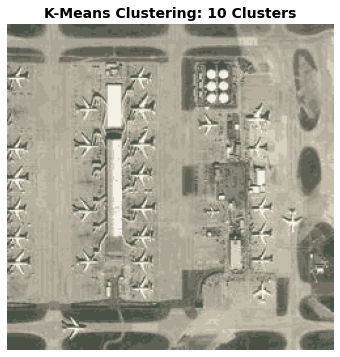

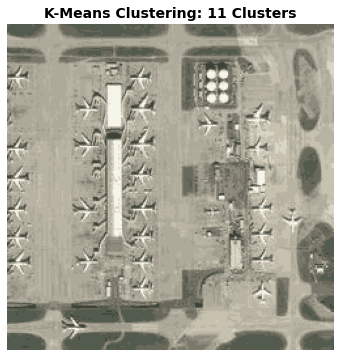

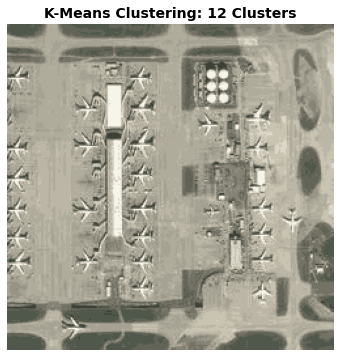

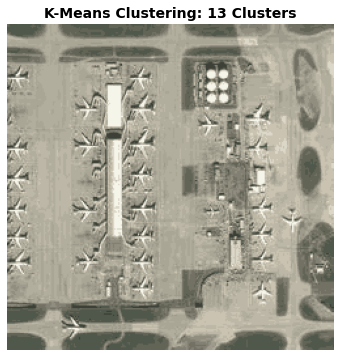

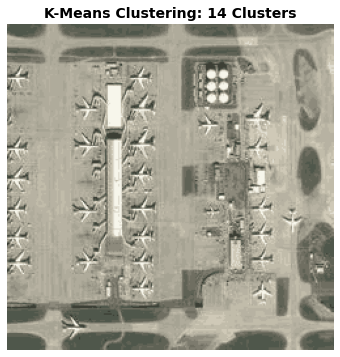

In [78]:
for i in range(len(clustered)):
    plt.figure(figsize=(6,6)) # Figure
    plt.imshow(clustered[i]) # Show image
    plt.title(f'K-Means Clustering: {i+1} Clusters', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Title
    plt.axis('off') # Axis off
    plt.show() # Show

### Optimal Clusters

In [53]:
opt_k = 3
kmeans = KMeans(n_clusters=opt_k, random_state=0, max_iter=400, init='k-means++') # K-Means Object
kmeans = kmeans.fit(img_flat) # Fit Data

In [54]:
img_flat_opt = img_flat.copy() # Copy dummy
# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat_opt[kmeans.labels_==i,:] = kmeans.cluster_centers_[i] # Reshape

In [76]:
kmeans.inertia_

43517829.2406752

#### Plot Image

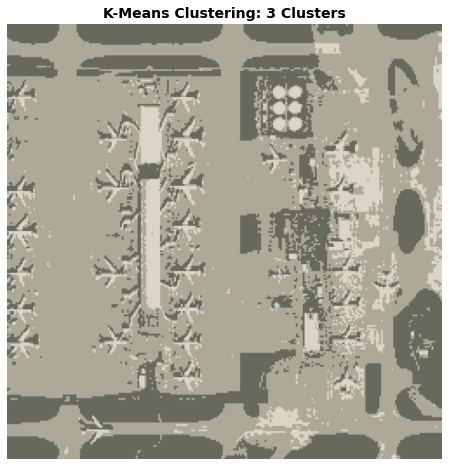

In [55]:
img_k = img_flat_opt.reshape(img1.shape)
plt.figure(figsize=(8,8)) # Figure
plt.imshow(img_k, cmap='jet') # Show image
plt.title(f'K-Means Clustering: {opt_k} Clusters', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Title
plt.axis('off') # Axis off
plt.show() # Show

### DBSCAN

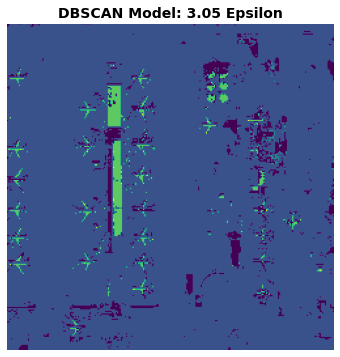

In [91]:
epsilon = [3.05] # Epsilon
dbs_images = [] # Empty List to store clustered images
for eps in epsilon:
    db = DBSCAN(eps=eps, min_samples=75, metric = 'euclidean', algorithm ='auto') # DBSCAN Object
    dbs = db.fit(img_flat) # Fit image
    labels = dbs.labels_ # Get Labels
    image_dbs = np.reshape(labels, [x1, x2]) # Reshape to form images
    # Image
    plt.figure(figsize=(6,6)) # Figure
    plt.imshow(image_dbs) # Show image
    plt.title(f'DBSCAN Model: {eps} Epsilon', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Title
    plt.axis('off') # Axis off
    plt.show() # Show

### GMM

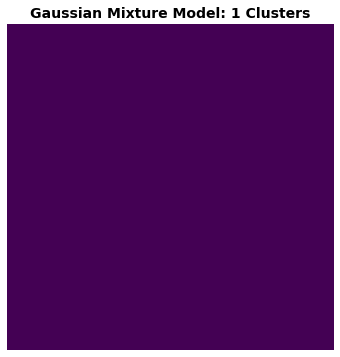

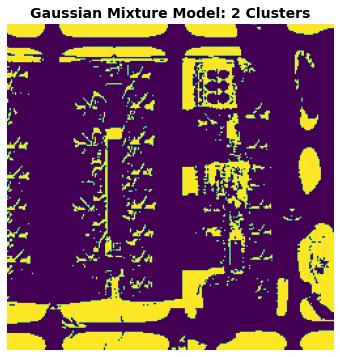

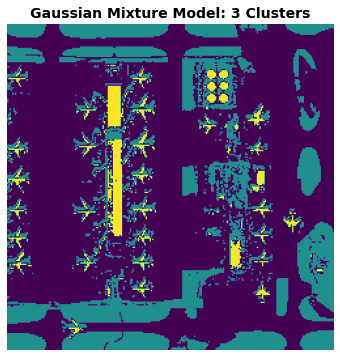

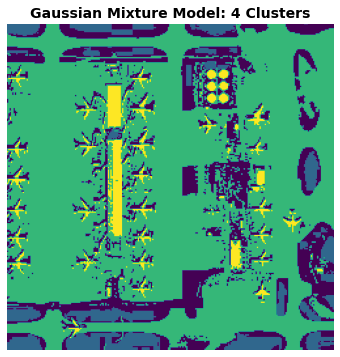

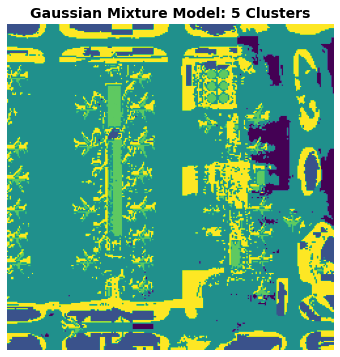

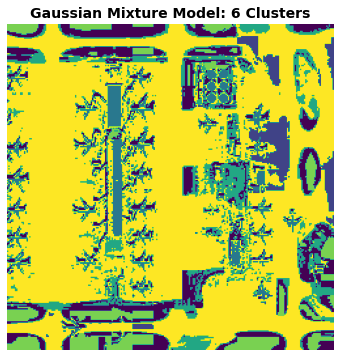

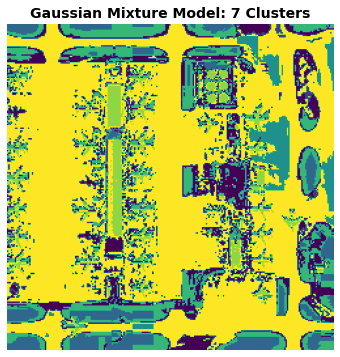

In [92]:
clusters = [1,2,3,4,5,6,7]
for i in clusters:
    gmm_model =GMM(n_components=i, covariance_type='tied').fit(img_flat) # GMM Object and fit
    gmm_pred = gmm_model.predict(img_flat) # Predict
    image_gmm = gmm_pred.reshape(x1,x2) # Image Format
    plt.figure(figsize=(6,6)) # Figure
    plt.imshow(image_gmm) # Show image
    plt.title(f'Gaussian Mixture Model: {i} Clusters', fontdict={'fontsize':14, 'fontweight':'semibold'}) # Title
    plt.axis('off') # Axis off
    plt.show() # Show